#                            K-Means - Comicon Dataset

### I have used the following tools and concepts to build a model for the Comicon Dataset:
* Pandas
* Numpy
* Matplotlib 
* Scipy
* K-Means Clustering
* Seaborn
* Elbow plot
* Whiten method for scaling

In [7]:
# Imorting libraries
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

In [2]:
# Loading the dataset
comic_con = pd.read_csv("comic-con.csv")
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [4]:
# Scaling the data using whiten method (dividing the variables with thier std)
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

# Exploring the dataset after adding scaled data
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


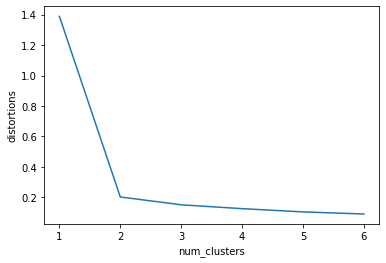

In [5]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

### Inference
* From the above plot, it can bee seen the the elbow point is observed at 2.
* Therefore the optimal number of clusters is 2.

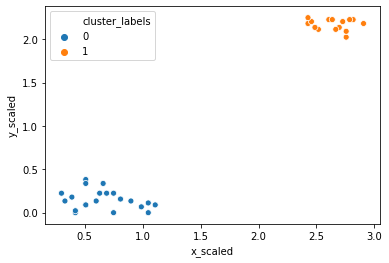

In [8]:
# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()